# Multithreading


The XGBoost library for gradient boosting uses is designed for e cient multi-core parallel processing. This allows it to e ciently use all of the CPU cores in your system when training.

### Evaluating the effect of number of threads

In [ ]:
results = []
num_threads = [1,2,3,4]
for n in num_threads:
    start = time.time()
    model = XGBClassifier(nthread=n)
    model.fit(x_train, y_train)
    elapsed = time.time() - start
    print(n, elapsed)
    results.append(elapsed)

### Using this approach with the Otto dataset

In [9]:
#Load Libraries
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from time import time
from matplotlib import pyplot as pt

#Load Data and Split X/Y
filename = "train.csv"
data = read_csv(filename)
X = data.values[:,0:94]
Y = data.values[:, 94]
data.shape

(61878, 95)

1 180.5742630958557
2 180.92088294029236
3 178.7580530643463
4 176.77408695220947


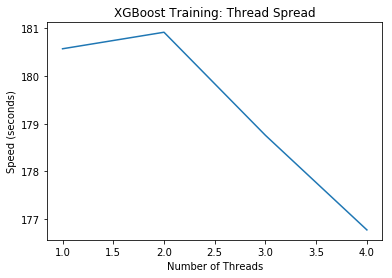

In [14]:
#Encode String Target Variable as integers
encoded_y = LabelEncoder().fit_transform(Y)

#Evaluate the effect of number of threads
results = []
threads = [1,2,3,4,]
for n in threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, encoded_y)
    elapsed = time() - start
    print(n,elapsed)
    results.append(elapsed)

#Plot results
pt.plot(threads, results)
pt.ylabel('Speed (seconds)')
pt.xlabel('Number of Threads')
pt.title("XGBoost Training: Thread Spread")
pt.show()

# Parallelism When Cross Validating XGBoost Models

In [22]:
#import libraries
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from time import time

#Load Data and Split X/Y; Encode Target Var
filename = "train.csv"
data = read_csv(filename)
X = data.values[:,0:94]
Y = data.values[:, 94]
encoded_y = LabelEncoder().fit_transform(Y)

#Create Train/Test Sets
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.33, random_state = seed)

#Training Harness
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = seed)
scoring = "neg_log_loss"

#Single Thread XGBoost, Parallel Thread CV
start = time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, x_train, y_train, 
                          cv = kfold, scoring = scoring, n_jobs=-1)
elapsed = time() - start
print("Single Thread XGBoost, Parallel Thread CV: %f" %(elapsed))

#Parallel Thread XGBoost, Single Thread CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, x_train, y_train, 
                         cv = kfold, scoring = scoring, n_jobs=1)
elapsed = time() - start
print("Parallel Thread XGBoost, Singled Thread CV: %f" %(elapsed))

#Single Thread XGboost, Single Thread CV
start = time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, x_train, y_train, 
                         cv = kfold, scoring = scoring, n_jobs=1)
print("Singled Thread XGboost, Singled Thread CV")

#Parallel Thread XGBoost, Parallel Thread CV
start = time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, x_train, y_train, 
                         cv = kfold, scoring = scoring, n_jobs=-1)
elapsed = time() - start
print("Parallel Thread XGBoost, Parallel Thread CV: %f" %(elapsed))



Single Thread XGBoost, Parallel Thread CV: 525.463297


NameError: name 'XGBclassifier' is not defined